# Explore here

Load the data

In [27]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


We are only interested in the columns Lat, Lon and MedInc:

In [28]:
df = df[['Latitude', 'Longitude', 'MedInc']]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In this case we need to create the train and test as usual, but with no target (y)

In [29]:
from sklearn.model_selection import train_test_split

X = df
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 77)

X_train.to_csv("/workspaces/KMeans/data/raw/Train.csv", index=False)
X_test.to_csv("/workspaces/KMeans/data/raw/Test.csv", index=False)

X_train.head()


,Latitude,Longitude,MedInc
19437,37.69,-121.01,2.4800
2690,32.97,-115.52,1.9750
12690,38.57,-121.37,5.2449
8294,33.76,-118.13,4.2500
17990,37.28,-121.95,4.0208


Now, the model with 6 clusters:

In [30]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 77)
model.fit(X_train)


KMeans(n_clusters=6, random_state=77)

Let's create a new colu with the model

In [34]:
X_train["Cluster"] = model.labels_.tolist()

X_train.head()

,Latitude,Longitude,MedInc,Cluster
19437,37.69,-121.01,2.4800,0
2690,32.97,-115.52,1.9750,1
12690,38.57,-121.37,5.2449,3
8294,33.76,-118.13,4.2500,4
17990,37.28,-121.95,4.0208,3


Let's plot the data:

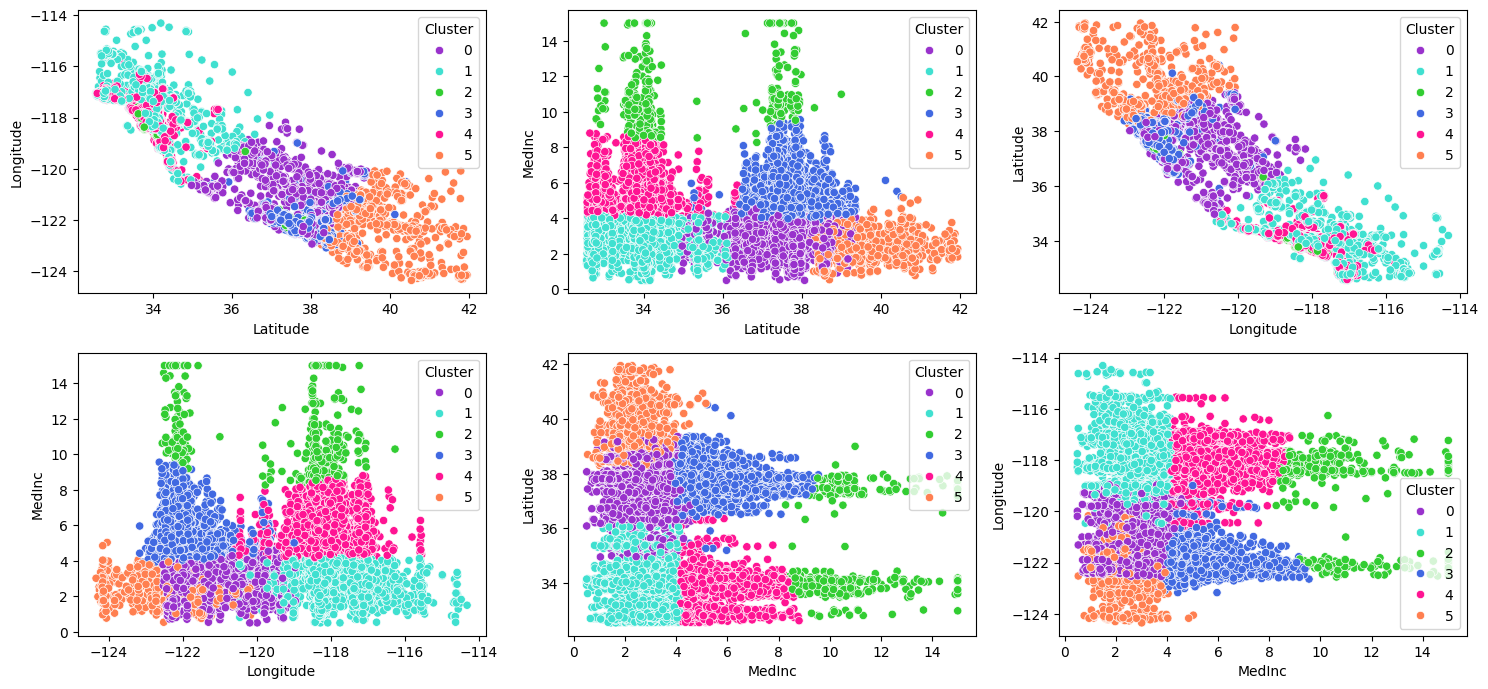

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["darkorchid", "turquoise", "limegreen", 'royalblue', 'deeppink', 'coral']
sns.scatterplot(ax = axis[0, 0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = X_train, x = "Longitude", y = "Latitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = X_train, x = "MedInc", y = "Latitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = X_train, x = "MedInc", y = "Longitude", hue = "Cluster", palette = palette)

plt.tight_layout()

plt.show()

The green cluster (2) is for high MedInc, no matter Lat or Lon. Then, for medium MedInc there are two clusters (3 AND 4): one for higher latitude and lower longitude and the other one for the other way round. For lower MedInc we have three clusters (0, 1  and 5) 

Let's now predict:

In [42]:
pred = model.predict(X_test)
X_test["Cluster"] =pred.tolist()
X_test.head()

,Latitude,Longitude,MedInc,Cluster
16973,37.56,-122.31,4.7917,3
4732,34.05,-118.36,3.3333,1
11854,39.83,-120.46,2.2717,5
14574,32.82,-117.22,3.7963,1
17430,34.65,-120.44,1.9750,1


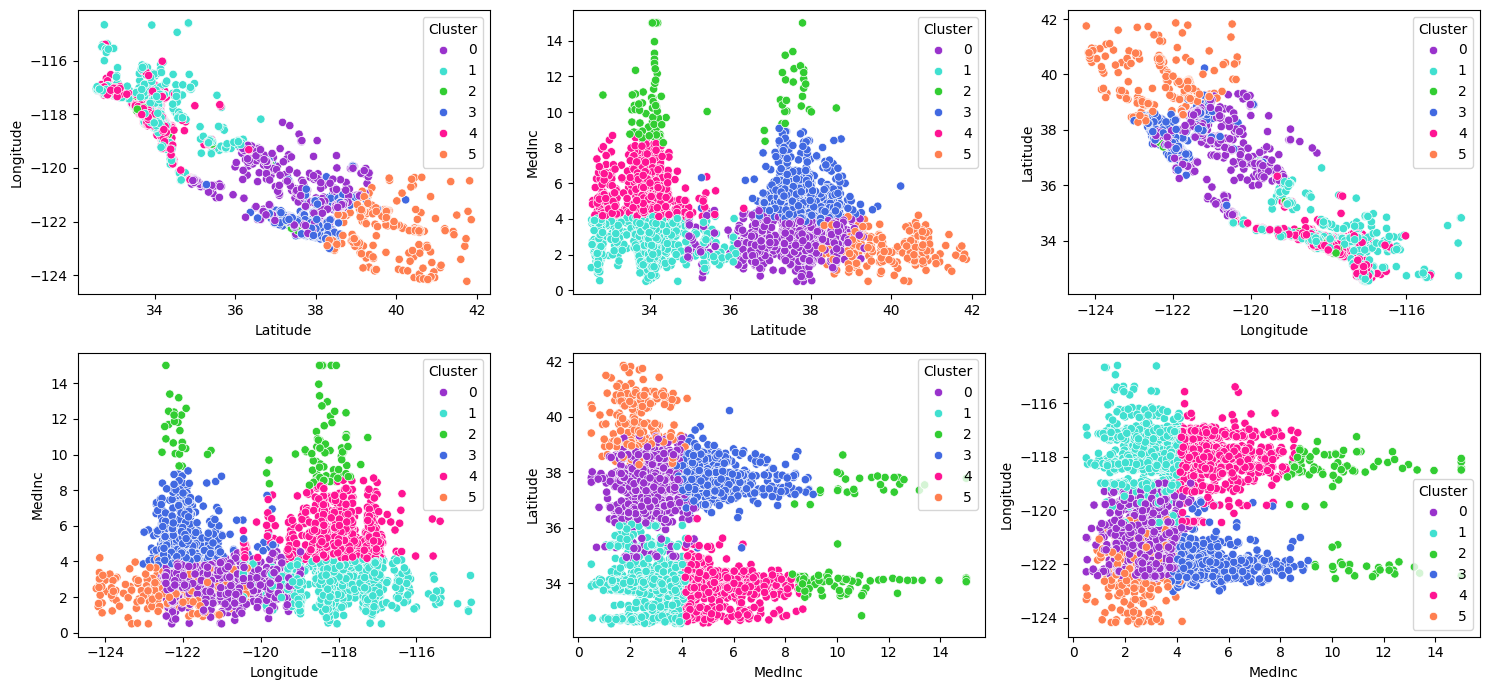

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["darkorchid", "turquoise", "limegreen", 'royalblue', 'deeppink', 'coral']
sns.scatterplot(ax = axis[0, 0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = X_test, x = "Longitude", y = "Latitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = X_test, x = "MedInc", y = "Latitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = X_test, x = "MedInc", y = "Longitude", hue = "Cluster", palette = palette)

plt.tight_layout()

plt.show()

Very similar to the previous one, let's now combine them together

In [44]:
df2 = pd.concat([X_train, X_test], ignore_index=True)
df2

,Latitude,Longitude,MedInc,Cluster
0,37.69,-121.01,2.4800,0
1,32.97,-115.52,1.9750,1
2,38.57,-121.37,5.2449,3
3,33.76,-118.13,4.2500,4
4,37.28,-121.95,4.0208,3
...,...,...,...,...
20635,35.61,-117.64,4.2500,4
20636,37.94,-122.52,5.9582,3
20637,33.98,-118.32,3.2344,1
20638,33.07,-117.10,8.6803,4


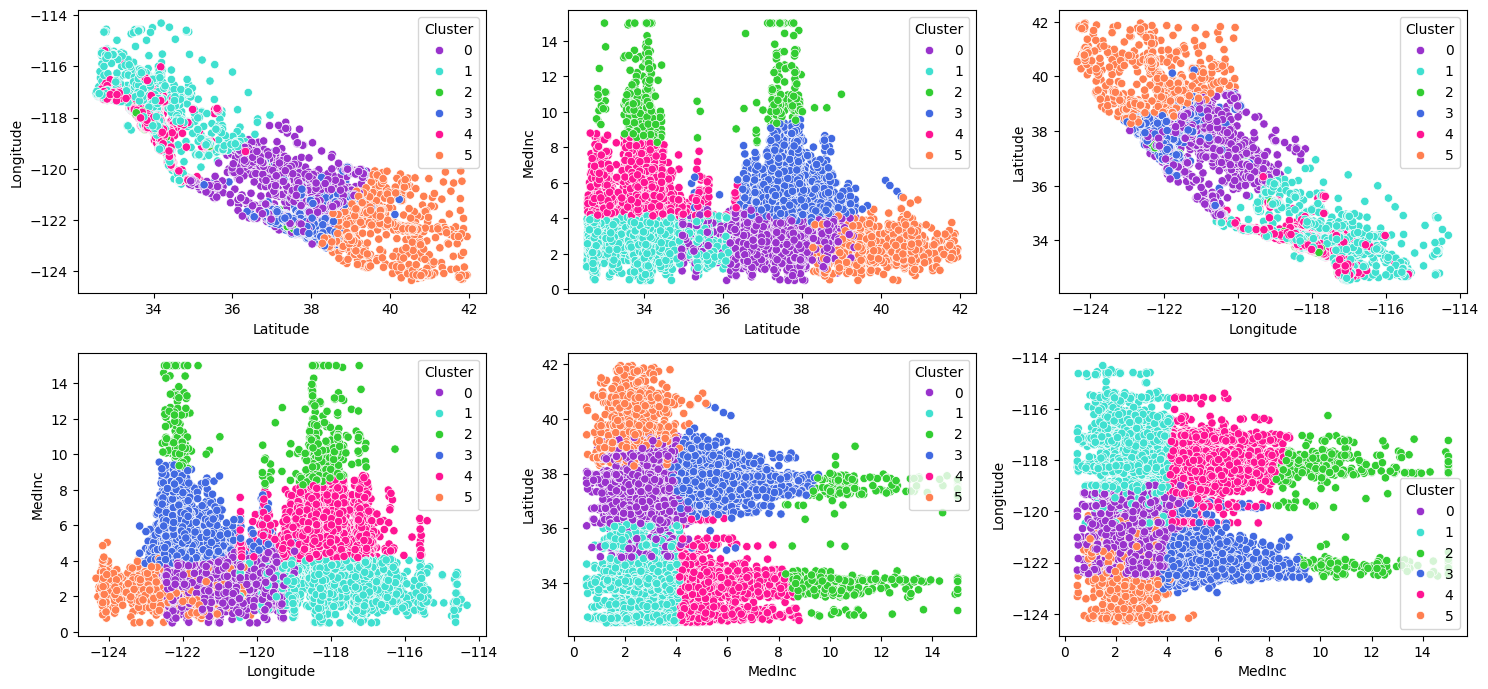

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["darkorchid", "turquoise", "limegreen", 'royalblue', 'deeppink', 'coral']
sns.scatterplot(ax = axis[0, 0], data = df2, x = "Latitude", y = "Longitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = df2, x = "Latitude", y = "MedInc", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = df2, x = "Longitude", y = "Latitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = df2, x = "Longitude", y = "MedInc", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = df2, x = "MedInc", y = "Latitude", hue = "Cluster", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = df2, x = "MedInc", y = "Longitude", hue = "Cluster", palette = palette)

plt.tight_layout()


It looks great :)

For the supervised model I am going to use the decision tree, as it is the best option.

In [49]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state = 77)
model2.fit(X_train, X_train['Cluster'])

DecisionTreeClassifier(random_state=77)

In [50]:
from sklearn.metrics import accuracy_score

pred2 = model2.predict(X_test)
accuracy_score(X_test['Cluster'], pred2)

0.9997577519379846

werid, but great.

Save the models:

In [54]:
from pickle import dump
dump(model, open("/workspaces/KMeans/data/processed/UnsupervisedModel.sav", "wb"))
dump(model2, open("/workspaces/KMeans/data/processed/SupervidedModel.sav", "wb"))